## Advance Numpy

#### **Numpy vs Python List**

| Aspect          | NumPy Array                                                                                               | Python List                                                                        |
| --------------- | --------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------- |
| **Speed**       | Much faster due to optimized C backend                                                                    | Slower as operations are done element-wise in Python                               |
| **Memory**      | Uses less memory (fixed and same data types)                                                              | Uses more memory (stores type info + data)                                         |
| **Convenience** | Convenient for numerical computations with built-in functions (e.g., broadcasting, vectorized operations) | More flexible (can hold mixed data types), but less convenient for math operations |


**In Terms of Time**

List

In [2]:
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []

import time
start = time.time()
for i in range(len(a)):
    c.append(a[i] + b[i])

print(time.time() - start)
    

2.749147653579712


Numpy Array

In [3]:
import numpy as np

In [4]:
a1 = np.arange(10000000)
a2 = np.arange(10000000,20000000)

start = time.time()

c = a + b

print(time.time() - start)

0.3527987003326416


**Note : You can see the difference of time (in sec) between list and numpy array**

**In Terms of Memory**

List

In [5]:
a = [i for i in range(10000000)]

import sys

sys.getsizeof(a)

89095160

Numpy array

In [6]:
ar = np.arange(10000000)

sys.getsizeof(ar)

80000112

In [7]:
# You can see the difference between list and numpy array ( int64 )

89095160 - 80000112   # difference is around 91 lakhs bytes

9095048

In [8]:
# we can also reduce # Example 

# See this the code of list the size of numpy array as per usecases ( by using int 32 not int64)

ar = np.arange(10000000,dtype=np.int32)

sys.getsizeof(ar)



40000112

In [9]:
# list vs int32 array

89095160 - 40000112

# difference is around 4 crore 90 lakks bytes

49095048

In [10]:
# int64 vs int 32
80000112 - 40000112 

# difference of 4 crore


40000000

**In Terms of Convenience**

In [11]:
# This is easy to work with , multiple built in function and all , etc


#### **Advance indexing**

- **Fancy Indexing**

- **Boolean Indexing**

**Fancy Indexing**

In [12]:
a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [13]:
print(a[[0,2,3]])

[[ 0  1  2  3]
 [ 8  9 10 11]
 [12 13 14 15]]


In [14]:
# Example 
print(a[[0,2,3,-1]])

[[ 0  1  2  3]
 [ 8  9 10 11]
 [12 13 14 15]
 [20 21 22 23]]


In [15]:
# Example 

print(a[:,[0,2,3]])

[[ 0  2  3]
 [ 4  6  7]
 [ 8 10 11]
 [12 14 15]
 [16 18 19]
 [20 22 23]]


**Boolean Indexing**

In [16]:
a = np.random.randint(1,100,24).reshape(6,4)
print(a)

[[11 30 45 88]
 [30 60 70  7]
 [13 88 55 84]
 [80 83 33  1]
 [64 90 33 33]
 [54 21  9 81]]


In [17]:
# Example : Find all number greater than 50

print(a[a > 50])

[88 60 70 88 55 84 80 83 64 90 54 81]


In [18]:
# Example : Find out even numbers

print(a[a%2==0])

[30 88 30 60 70 88 84 80 64 90 54]


In [19]:
# Example : Take out the which are even and greater than 50

a[(a > 50) & (a % 2 == 0)]

array([88, 60, 70, 88, 84, 80, 64, 90, 54])

In [20]:
# Example : Take out the number divisible by 7

print(a[a % 7 == 0])

[70  7 84 21]


In [21]:
# For not divisible by 7

print(a[~(a % 7 == 0)])

[11 30 45 88 30 60 13 88 55 80 83 33  1 64 90 33 33 54  9 81]


#### **Broadcasting**

**`Broadcasting` in NumPy is a mechanism that allows NumPy to perform arithmetic operations on arrays of different shapes without explicitly copying the data**

**The smaller array is `broadcast` across the larger array so that they have compatible shapes**



In [22]:
# same shape 

a = np.arange(6).reshape(2,3)

b = np.arange(6,12).reshape(2,3)

print(a)
print()
print(b)

[[0 1 2]
 [3 4 5]]

[[ 6  7  8]
 [ 9 10 11]]


In [23]:
print(a + b)

[[ 6  8 10]
 [12 14 16]]


In [24]:
# with different shape

a = np.arange(6).reshape(2,3)

b = np.arange(3).reshape(1,3)

print(a)
print()
print(b)

[[0 1 2]
 [3 4 5]]

[[0 1 2]]


In [25]:
print(a+b)

[[0 2 4]
 [3 5 7]]


##### **Broadcasting Rules**

**Make the two arrays have the same number of dimnesions**

- If the number of dimensions of two arrays is different, add new dimensions of size 1 to the beginning of the array with fewer dimensions

**Make each dimension of the two arrays the same size**

- If the size of each dimension of two array do not match, dimensions with size 1 is stretched to the size of other array

- If there is dimension whose is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised

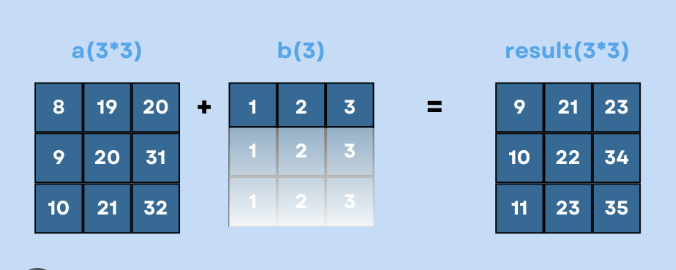

**More Examples**

In [26]:
a = np.arange(12).reshape(4,3)

b = np.arange(3)

print(a)
print()
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

[0 1 2]


In [27]:
print(a + b)

[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [28]:
# Example 2 

a = np.arange(12).reshape(3,4)

b = np.arange(3)

print(a)
print()
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[0 1 2]


In [29]:
# print(a + b)   ---> This will give error , because after broadcast both are not same

In [30]:
# Example 3 

a = np.arange(3).reshape(1,3)

b = np.arange(3).reshape(3,1)

print(a)
print()
print(b)

[[0 1 2]]

[[0]
 [1]
 [2]]


In [31]:
print(a + b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [32]:
# Example 4 

a = np.arange(3).reshape(1,3)

b = np.arange(4).reshape(4,1)

print(a)
print()
print(b)

[[0 1 2]]

[[0]
 [1]
 [2]
 [3]]


In [33]:
print(a + b)

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [34]:
# Example 5

a = np.arange(12).reshape(3,4)

b = np.arange(12).reshape(4,3)

print(a)
print()
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [35]:
# print(a + b)  ---> It will error , we want 1

#### **Working with mathematical formulas**

In [36]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**Sigmoid Function** 

Formula :

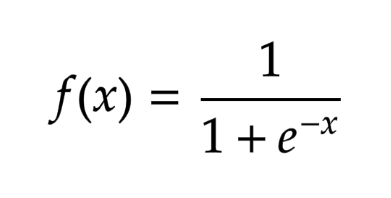

**Range : 0 to 1**

In [37]:
def sigmoid(array):
    
    return 1 / (1 + np.exp(-(array)))

In [38]:
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [39]:
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

**Mean Squared Error**

Formula : 

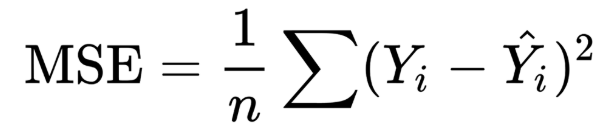

In [40]:
actual = np.random.randint(1,30,25)

predicted = np.random.randint(1,30,25)

In [41]:
def mse(actual,predicted):
    
    return np.mean((actual - predicted)**2)

In [42]:
print(mse(actual,predicted))

68.04


**Binary Cross Entropy**

Formula : 

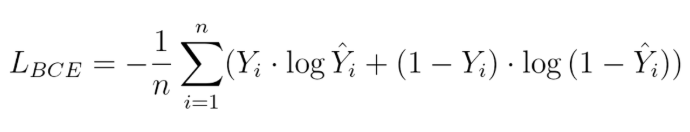

In [43]:
actual = np.random.randint(1,30,25)

predicted = np.random.randint(1,30,25)

In [44]:
def BCE(actual, predicted):
    
    epsilon = 1e-15
    predicted = np.clip(predicted, 1e-15, 1- 1e-15)
    return -np.mean(((actual*np.log(predicted)) + (1 - actual)*np.log(1 - predicted)))

In [45]:
print(BCE(actual, predicted))

-429.67232534472055


#### **Working with missing values**

In [63]:
# Array with nan values ---> using np.nan 

a = np.array([1,2,3,4,np.nan,6])

a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [64]:
# Just to remove that missing value
a = a[~np.isnan(a)]
a

array([1., 2., 3., 4., 6.])

#### **Plotting Graph**

**Plotting 2D plot ---> x = y**

In [70]:
x = np.linspace(-10,10,100)

y = x

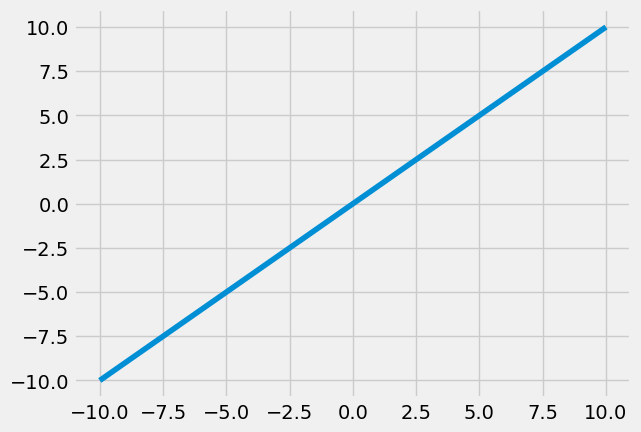

In [74]:
# Don't, consider it , just to show the plot

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

# Don't focus on above code ^

plt.plot(x,y)  # The x and y 

**Example 2 : y = x^2**

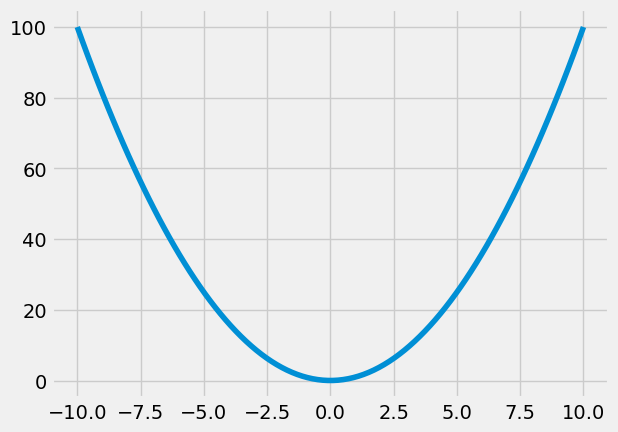

In [75]:
x = np.linspace(-10,10,100)

y = x**2

plt.plot(x,y)

**Example 3 : y = sin(x)**

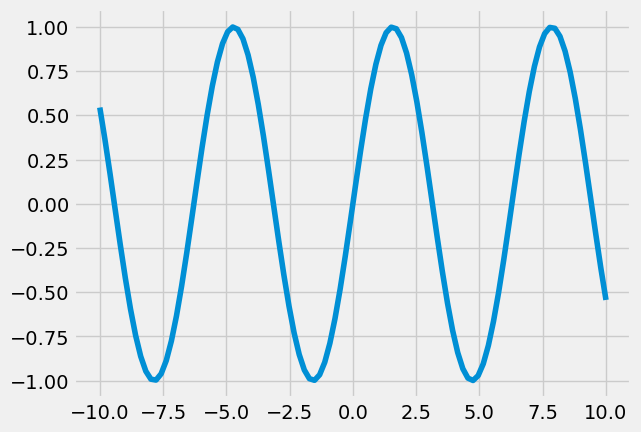

In [77]:
x = np.linspace(-10,10,100)

y = np.sin(x)

plt.plot(x,y)

**Example 4 : y = x log ( x )**

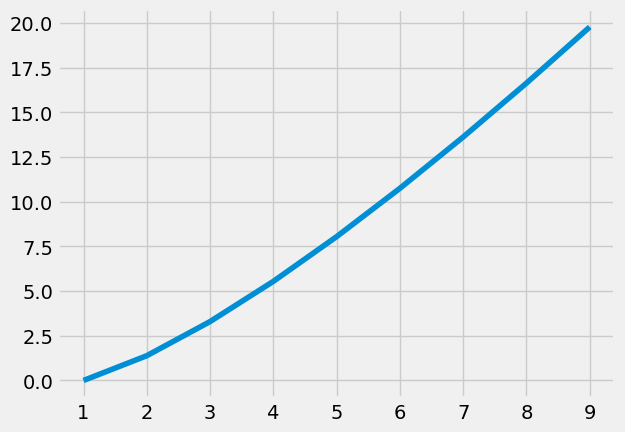

In [87]:
x = np.arange(1,10)

y = x*(np.log(x))

plt.plot(x,y)

**Example : Plotting Sigmoid Function**

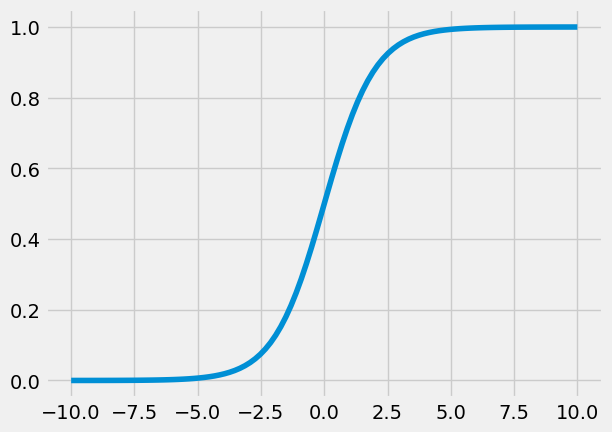

In [88]:
x = np.linspace(-10,10,100)
y = 1 / (1 + np.exp(-x))

plt.plot(x,y)